    Logistic Regression

Question 1. Use logistic regression to find decision boundary For the 
given database. Set your learning rate to 0.1. What is th 
cost function val e and learning parameter value aft r
convergence?

In [4]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def compute_cost(self, X, Y):
        m = len(Y)
        h = self.sigmoid(X @ self.theta)
        cost = (-1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))
        return cost
    
    def fit(self, X, Y):
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        Y = Y.values
        self.cost_history = []
        
        for i in range(self.num_iterations):
            h = self.sigmoid(X @ self.theta)
            gradient = (1/m) * X.T @ (h - Y)
            self.theta -= self.learning_rate * gradient
            cost = self.compute_cost(X, Y)
            self.cost_history.append(cost)
            if i > 0 and abs(self.cost_history[-2] - self.cost_history[-1]) < 1e-6:
                break
    
    def predict(self, X):
        return self.sigmoid(X @ self.theta) >= 0.5

In [8]:
#data set
import pandas as pd

X = pd.read_csv("logisticX.csv", header=None)
Y = pd.read_csv("logisticY.csv", header=None)
X, Y

(         0       1
 0   3.8915  4.2105
 1   3.6898  6.6051
 2   2.7763  7.5057
 3   3.1137  5.7724
 4   2.9251  5.4315
 ..     ...     ...
 95  5.7629  4.6161
 96  4.1817  4.0577
 97  6.3065  2.4776
 98  5.6043  3.3146
 99  7.0567  4.7346
 
 [100 rows x 2 columns],
     0
 0   0
 1   0
 2   0
 3   0
 4   0
 .. ..
 95  1
 96  1
 97  1
 98  1
 99  1
 
 [100 rows x 1 columns])

In [12]:
# normalization
import numpy as np


X_normalized = (X - X.mean()) / X.std()

X_b = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

In [14]:
# training

model = LogisticRegression(learning_rate=0.1)
model.fit(X_b, Y)

Question 2. Plot cost function v/s iteration graph for the model trained 
in question 1. Plot the line as shown here -
https://pythonguides.com/matplotlib-plot-a-line/#Matplotlib_l
ot_a_line_ch . rt
Do not use scatter plots for tis.

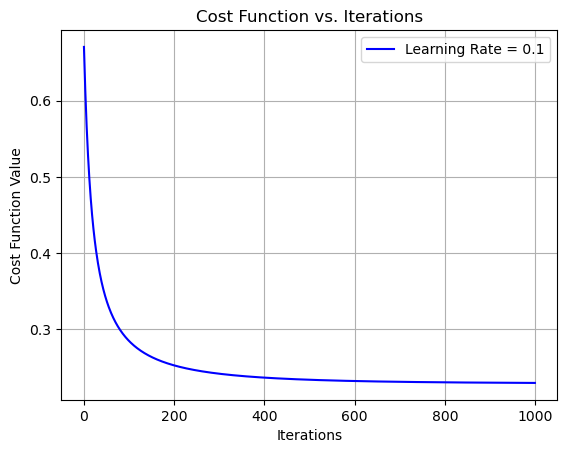

In [19]:
#cost function VS iteration plot

import matplotlib.pyplot as plt


plt.plot(range(len(model.cost_history)), model.cost_history, label="Learning Rate = 0.1", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs. Iterations")
plt.legend()
plt.grid()
plt.show()

Question 3. Plot the given dataset on a graph, use different colours for different classes and also show the decision boundary you obtained in question 1.

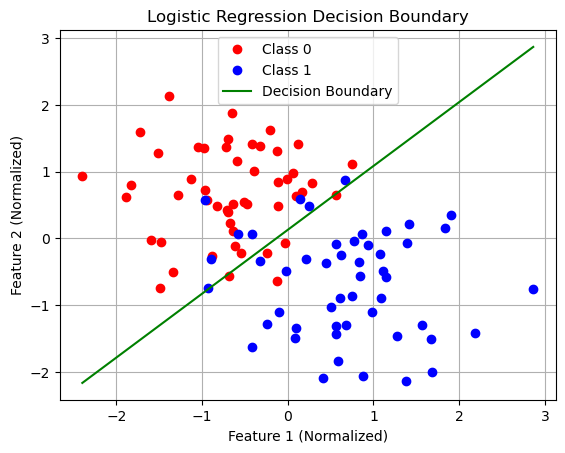

In [22]:
# seperation of classes by decision boundary

class_0 = X_normalized[Y[0] == 0]
class_1 = X_normalized[Y[0] == 1]
x_values = np.linspace(X_normalized[0].min(), X_normalized[0].max(), 100)
y_values = -(model.theta[0] + model.theta[1] * x_values) / model.theta[2]
plt.plot(class_0[0], class_0[1], 'ro', label="Class 0")
plt.plot(class_1[0], class_1[1], 'bo', label="Class 1")
plt.plot(x_values, y_values, 'g-', label="Decision Boundary")
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid()
plt.show()

Question 4. Train your model with learning rate of 0.1 and 5. Plot the cost-function/ iterations curve for both the learning rates on the graph. For this task, train your model with 100 iterations.

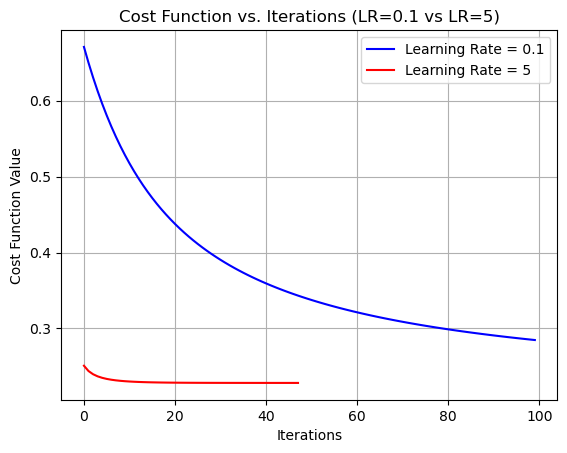

In [32]:
#traning with 5 and .1

model_lr5 = LogisticRegression(learning_rate=5, num_iterations=100)
model_lr5.fit(X_b, Y)
model_lr01 = LogisticRegression(learning_rate=0.1, num_iterations=100)
model_lr01.fit(X_b, Y)

# graph

plt.plot(range(len(model_lr01.cost_history)), model_lr01.cost_history, label="Learning Rate = 0.1", color="blue")
plt.plot(range(len(model_lr5.cost_history)), model_lr5.cost_history, label="Learning Rate = 5", color="red")
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs. Iterations (LR=0.1 vs LR=5)")
plt.legend()
plt.grid()
plt.show()

Question 5. Find the confusion matrix for your training dataset. Using the 
confusion matrix to calculate the accuracy, precision, recall 
F1-scor.

In [43]:
# valuse
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = model_lr01.predict(X_b)
conf_matrix = confusion_matrix(Y, pred)
accuracy = accuracy_score(Y, pred)
precision = precision_score(Y, pred)
recall = recall_score(Y, pred)
f1 = f1_score(Y, pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Confusion Matrix:
 [[47  3]
 [ 8 42]]
Accuracy: 0.89
Precision: 0.9333333333333333
Recall: 0.84
F1-Score: 0.8842105263157894
